In [354]:
#!pip install --upgrade pip
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

step 1: Load and understand Dataset

In [356]:
# Read multiple CSV files
calender_df = pd.read_csv("A:/Data seekho/DSMP/E-commerce churn analysis/ecommerce-churn-prediction/data/dim_calendar.csv")
customers_df = pd.read_csv("A:/Data seekho/DSMP/E-commerce churn analysis/ecommerce-churn-prediction/data/dim_customers.csv")
location_df = pd.read_csv("A:/Data seekho/DSMP/E-commerce churn analysis/ecommerce-churn-prediction/data/dim_location.csv")
payment_df = pd.read_csv("A:/Data seekho/DSMP/E-commerce churn analysis/ecommerce-churn-prediction/data/dim_payments.csv")
transaction_df = pd.read_csv("A:/Data seekho/DSMP/E-commerce churn analysis/ecommerce-churn-prediction/data/dim_transactions.csv")


In [357]:
# shape of all ata frame
print(calender_df.shape)
print(customers_df.shape)
print(location_df.shape)
print(payment_df.shape)
print(transaction_df.shape)

(4018, 6)
(999, 15)
(60, 5)
(10, 4)
(10000, 9)


In [358]:
calender_df.head(10)

,date_key,day_of_week,month,year,quarter,is_holiday
0,2020-01-01,Wednesday,January,2020,2020Q1,0
1,2020-01-02,Thursday,January,2020,2020Q1,0
2,2020-01-03,Friday,January,2020,2020Q1,0
3,2020-01-04,Saturday,January,2020,2020Q1,1
4,2020-01-05,Sunday,January,2020,2020Q1,1
5,2020-01-06,Monday,January,2020,2020Q1,0
6,2020-01-07,Tuesday,January,2020,2020Q1,0
7,2020-01-08,Wednesday,January,2020,2020Q1,0
8,2020-01-09,Thursday,January,2020,2020Q1,0
9,2020-01-10,Friday,January,2020,2020Q1,0


In [359]:
customers_df.head(10)

,customer_id,first_name,last_name,gender,age,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,1,Patricia,Macdonald,Female,51,1973-12-16,wilsonchristopher@hotmail.com,(568)800-3705,1,590,3,0,2022-03-10,49,453.22
1,2,Destiny,Evans,Other,56,1968-07-13,garciarobert@meyers.info,3579858634,0,648,4,0,2024-07-02,23,49.87
2,3,Sarah,Stone,Other,21,2003-09-12,gregorynichols@contreras.info,(233)051-2972x83053,0,1783,10,0,2023-06-24,45,178.78
3,4,Tara,Peterson,Female,25,1999-06-04,wcaldwell@yahoo.com,+1-980-912-2768x5416,1,514,9,0,2022-10-09,48,408.14
4,5,Patrick,Petersen,Female,57,1967-11-21,matthew65@miller.com,001-770-382-4507x93902,0,689,2,1,2020-07-24,4,328.80
5,6,Laura,Alexander,Female,67,1957-05-26,woodsvictoria@rodriguez-richard.com,001-149-904-5009x297,1,27,8,0,2023-03-25,41,246.59
6,7,Stephanie,Lynch,Male,52,1972-05-18,amy23@brown.com,693.754.8148x598,0,5,1,0,2024-07-18,35,324.09
7,8,Jeffrey,Hernandez,Other,57,1967-03-26,nicolerogers@hotmail.com,+1-440-323-8796x371,0,909,8,0,2024-05-28,11,377.84
8,9,Ernest,Holland,Female,58,1966-06-25,elizabeth80@yahoo.com,(213)514-4660,0,457,5,0,2021-05-28,24,407.68
9,10,Timothy,Shaffer,Female,28,1996-12-29,youngeddie@potter.com,+1-399-944-2087x70978,0,405,2,0,2020-04-29,7,93.50


In [360]:
location_df.head(10)

,location_id,shopping_mall,city,province_state,country
0,1,Mall of America,Bloomington,Minnesota,US
1,2,The Galleria,Houston,Texas,US
2,3,Westfield London,London,England,UK
3,4,Trafford Centre,Manchester,England,UK
4,5,King of Prussia Mall,Philadelphia,Pennsylvania,US
5,6,Aventura Mall,Miami,Florida,US
6,7,West Edmonton Mall,Edmonton,Alberta,Canada
7,8,Bluewater Shopping Centre,Dartford,Kent,UK
8,9,Bullring & Grand Central,Birmingham,West Midlands,UK
9,10,South Coast Plaza,Costa Mesa,California,US


In [361]:
payment_df.head(50)

,payment_id,payment_method,card_type,Unnamed: 3
0,1,Credit Card - Visa,Visa,NaN
1,2,Credit Card - MasterCard,MasterCard,NaN
2,3,Credit Card - AMEX,AMEX,NaN
3,4,Debit Card - Visa,Visa,NaN
4,5,Debit Card - MasterCard,MasterCard,NaN
5,6,PayPal,NaN,NaN
6,7,Cash,NaN,NaN
7,8,BNPL (Buy Now,Pay Later),NaN
8,9,Apple Pay,NaN,NaN
9,10,Google Pay,NaN,NaN


In [362]:
transaction_df.head(10)

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7
5,100005,Body Care and Hygiene,Hand Sanitizer,2,10.48,31,426,2024-04-07,1
6,100006,Skin Care,Moisturizer,3,43.91,52,509,2021-03-05,5
7,100007,Skin Care,Face Wash,4,10.75,58,242,2023-04-01,7
8,100008,Body Care and Hygiene,Body Lotion,3,20.20,15,276,2022-04-03,4
9,100009,Hair Care,Shampoo,4,5.46,17,568,2023-05-14,5


In [363]:
# Data types of columns
print(calender_df.dtypes)
print("--------------------")
print(customers_df.dtypes)
print("--------------------")
print(location_df.dtypes)
print("--------------------")
print(payment_df.dtypes)
print("--------------------")
print(transaction_df.dtypes)


date_key       object
day_of_week    object
month          object
year            int64
quarter        object
is_holiday      int64
dtype: object
--------------------
customer_id                   int64
first_name                   object
last_name                    object
gender                       object
age                           int64
dob                          object
email                        object
phone_number                 object
is_churned                    int64
days_since_last_purchase      int64
tenure                        int64
discount_used                 int64
last_purchase_date           object
purchase_frequency            int64
avg_purchase_value          float64
dtype: object
--------------------
location_id        int64
shopping_mall     object
city              object
province_state    object
country           object
dtype: object
--------------------
payment_id          int64
payment_method     object
card_type          object
Unnamed: 3        fl

Step 2: Data Preprocessing & Cleaning

In [364]:
# Handle null values
print(calender_df.isnull().sum())
print("---------------------------")
print(customers_df.isnull().sum())
print("---------------------------")
print(location_df.isnull().sum())
print("---------------------------")
print(payment_df.isnull().sum())
print("---------------------------")
print(transaction_df.isnull().sum())

date_key       0
day_of_week    0
month          0
year           0
quarter        0
is_holiday     0
dtype: int64
---------------------------
customer_id                 0
first_name                  0
last_name                   0
gender                      0
age                         0
dob                         0
email                       0
phone_number                0
is_churned                  0
days_since_last_purchase    0
tenure                      0
discount_used               0
last_purchase_date          0
purchase_frequency          0
avg_purchase_value          0
dtype: int64
---------------------------
location_id       0
shopping_mall     0
city              0
province_state    0
country           0
dtype: int64
---------------------------
payment_id         0
payment_method     0
card_type          4
Unnamed: 3        10
dtype: int64
---------------------------
invoice_no      0
category        0
item            0
quantity        0
price           0
location_i

In [365]:
# Hanle duplicate values
print (f'calender table: {calender_df.duplicated().sum()}.')
print("---------------------------")
print(f'customer table: {customers_df.duplicated().sum()}')
print("---------------------------")
print(f'location table: {location_df.duplicated().sum()}')
print("---------------------------")
print(f'payment table: {payment_df.duplicated().sum()}')
print("---------------------------")
print(f'transaction table: {transaction_df.duplicated().sum()}')


calender table: 0.
---------------------------
customer table: 0
---------------------------
location table: 0
---------------------------
payment table: 0
---------------------------
transaction table: 0


In [366]:
# Example: Join customers and orders on 'customer_id'
merged_pay_tran = pd.merge(transaction_df, payment_df, on="payment_id", how="inner")  # Inner Join
merged_pay_tran.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,card_type,Unnamed: 3
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,MasterCard,NaN
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,NaN,NaN
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,NaN,NaN
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,NaN,NaN
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,NaN,NaN


In [367]:
merged_pay_tran.count()

invoice_no        10000
category          10000
item              10000
quantity          10000
price             10000
location_id       10000
customer_id       10000
invoice_date      10000
payment_id        10000
payment_method    10000
card_type          6020
Unnamed: 3            0
dtype: int64

In [368]:
merged_pay_tran_loc = pd.merge(merged_pay_tran, location_df, on="location_id", how="inner")  # Inner Join
merged_pay_tran_loc.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,card_type,Unnamed: 3,shopping_mall,city,province_state,country
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,MasterCard,NaN,Mall of America,Bloomington,Minnesota,US
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,NaN,NaN,Fashion Show Mall,Las Vegas,Nevada,US
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,NaN,NaN,Lakeside Shopping Centre,Thurrock,Essex,UK
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,NaN,NaN,Bullring & Grand Central,Birmingham,West Midlands,UK
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,NaN,NaN,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US


In [369]:
merged_pay_tran_loc.count()

invoice_no        10000
category          10000
item              10000
quantity          10000
price             10000
location_id       10000
customer_id       10000
invoice_date      10000
payment_id        10000
payment_method    10000
card_type          6020
Unnamed: 3            0
shopping_mall     10000
city              10000
province_state    10000
country           10000
dtype: int64

In [370]:
merged_pay_tran_loc_cus= pd.merge(merged_pay_tran_loc, customers_df, on="customer_id", how="left")  # Inner Join
merged_pay_tran_loc_cus.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,...,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,...,1999-07-13,michealbender@gmail.com,(309)938-3205x8088,1.0,1056.0,8.0,0.0,2021-08-15,30.0,280.82
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,...,1995-01-18,nicholasclark@flowers.net,(363)377-7602,1.0,1494.0,1.0,0.0,2020-01-19,30.0,52.40
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,...,2002-10-11,geraldcastro@mosley.com,661-041-4070x466,0.0,386.0,6.0,1.0,2021-04-06,42.0,165.90
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,...,1992-12-29,vguerrero@green.org,712-518-4596x428,0.0,482.0,3.0,1.0,2022-05-17,28.0,427.81
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,...,1989-08-17,qfloyd@gmail.com,249-201-6223,0.0,1309.0,2.0,1.0,2023-01-28,31.0,321.20


In [371]:
merged_pay_tran_loc_cus.count()

invoice_no                  10000
category                    10000
item                        10000
quantity                    10000
price                       10000
location_id                 10000
customer_id                 10000
invoice_date                10000
payment_id                  10000
payment_method              10000
card_type                    6020
Unnamed: 3                      0
shopping_mall               10000
city                        10000
province_state              10000
country                     10000
first_name                   9996
last_name                    9996
gender                       9996
age                          9996
dob                          9996
email                        9996
phone_number                 9996
is_churned                   9996
days_since_last_purchase     9996
tenure                       9996
discount_used                9996
last_purchase_date           9996
purchase_frequency           9996
avg_purchase_v

In [372]:
merged_pay_tran_loc_cus.rename(columns={'invoice_date': 'date_key'}, inplace=True)


In [373]:
merged_pay_tran_loc_cus.columns

Index(['invoice_no', 'category', 'item', 'quantity', 'price', 'location_id',
       'customer_id', 'date_key', 'payment_id', 'payment_method', 'card_type',
       'Unnamed: 3', 'shopping_mall', 'city', 'province_state', 'country',
       'first_name', 'last_name', 'gender', 'age', 'dob', 'email',
       'phone_number', 'is_churned', 'days_since_last_purchase', 'tenure',
       'discount_used', 'last_purchase_date', 'purchase_frequency',
       'avg_purchase_value'],
      dtype='object')

In [374]:
calender_df.count()

date_key       4018
day_of_week    4018
month          4018
year           4018
quarter        4018
is_holiday     4018
dtype: int64

In [375]:
merged_all_data = pd.merge(merged_pay_tran_loc_cus, calender_df, on="date_key", how="inner")
merged_all_data.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,date_key,payment_id,payment_method,...,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,day_of_week,month,year,quarter,is_holiday
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,...,8.0,0.0,2021-08-15,30.0,280.82,Wednesday,March,2023,2023Q1,0
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,...,1.0,0.0,2020-01-19,30.0,52.40,Saturday,April,2024,2024Q2,1
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,...,6.0,1.0,2021-04-06,42.0,165.90,Tuesday,May,2022,2022Q2,0
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,...,3.0,1.0,2022-05-17,28.0,427.81,Friday,January,2021,2021Q1,0
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,...,2.0,1.0,2023-01-28,31.0,321.20,Monday,February,2020,2020Q1,0


In [376]:
merged_all_data.count()

invoice_no                  10000
category                    10000
item                        10000
quantity                    10000
price                       10000
location_id                 10000
customer_id                 10000
date_key                    10000
payment_id                  10000
payment_method              10000
card_type                    6020
Unnamed: 3                      0
shopping_mall               10000
city                        10000
province_state              10000
country                     10000
first_name                   9996
last_name                    9996
gender                       9996
age                          9996
dob                          9996
email                        9996
phone_number                 9996
is_churned                   9996
days_since_last_purchase     9996
tenure                       9996
discount_used                9996
last_purchase_date           9996
purchase_frequency           9996
avg_purchase_v

In [377]:
merged_all_data['payment_method'].unique()

array(['Credit Card - MasterCard', 'Apple Pay', 'Google Pay', 'Cash',
       'Credit Card - Visa', 'Debit Card - MasterCard',
       'Debit Card - Visa', 'BNPL (Buy Now', 'PayPal',
       'Credit Card - AMEX'], dtype=object)

In [378]:
merged_all_data['city'].unique()

array(['Bloomington', 'Las Vegas', 'Thurrock', 'Birmingham',
       'Fort Lauderdale', 'Denver', 'Nashua', 'Boca Raton', 'Sheffield',
       'Los Angeles', 'Palo Alto', 'Lone Tree', 'New York', 'Reading',
       'Durham', 'Costa Mesa', 'Scottsdale', 'Glendale', 'Tampa',
       'London', 'Manchester', 'Frisco', 'Toronto', 'Columbus',
       'Bellevue', 'Cambridge', 'Dallas', 'Philadelphia', 'Gateshead',
       'Ottawa', 'McLean', 'Orlando', 'San Antonio', 'Dartford', 'Austin',
       'Atlanta', 'Garden City', 'Miami', 'West Nyack', 'Houston',
       'Charlotte', 'Oak Brook', 'San Francisco', 'Columbia', 'Dubai',
       'Short Hills', 'Palm Beach Gardens', 'Santa Monica', 'Annapolis',
       'Edmonton'], dtype=object)

In [379]:
merged_all_data['first_name']

0        Tiffany
1         Angela
2       Jonathan
3       Nicholas
4           Tara
          ...   
9995      Wesley
9996     Natasha
9997      Rachel
9998     Jeffrey
9999     Tiffany
Name: first_name, Length: 10000, dtype: object

In [380]:
merged_all_data['card_type'].unique()

array(['MasterCard', nan, 'Visa', ' Pay Later)', 'AMEX'], dtype=object)

In [381]:
merged_all_data["month"]

0           March
1           April
2             May
3         January
4        February
          ...    
9995          May
9996    September
9997     February
9998         June
9999     February
Name: month, Length: 10000, dtype: object

In [382]:
merged_all_data["category"]

0                   Hair Care
1       Body Care and Hygiene
2                   Skin Care
3       Body Care and Hygiene
4                   Oral Care
                ...          
9995                Hair Care
9996                Skin Care
9997    Body Care and Hygiene
9998                Skin Care
9999    Body Care and Hygiene
Name: category, Length: 10000, dtype: object

In [383]:
merged_all_data["first_name"].unique

<bound method Series.unique of 0        Tiffany
1         Angela
2       Jonathan
3       Nicholas
4           Tara
          ...   
9995      Wesley
9996     Natasha
9997      Rachel
9998     Jeffrey
9999     Tiffany
Name: first_name, Length: 10000, dtype: object>

In [384]:
merged_all_data.columns

Index(['invoice_no', 'category', 'item', 'quantity', 'price', 'location_id',
       'customer_id', 'date_key', 'payment_id', 'payment_method', 'card_type',
       'Unnamed: 3', 'shopping_mall', 'city', 'province_state', 'country',
       'first_name', 'last_name', 'gender', 'age', 'dob', 'email',
       'phone_number', 'is_churned', 'days_since_last_purchase', 'tenure',
       'discount_used', 'last_purchase_date', 'purchase_frequency',
       'avg_purchase_value', 'day_of_week', 'month', 'year', 'quarter',
       'is_holiday'],
      dtype='object')

In [385]:
# Handle Missing Values
merged_all_data.ffill()  # Forward fill missing values

,invoice_no,category,item,quantity,price,location_id,customer_id,date_key,payment_id,payment_method,...,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,day_of_week,month,year,quarter,is_holiday
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,...,8.0,0.0,2021-08-15,30.0,280.82,Wednesday,March,2023,2023Q1,0
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,...,1.0,0.0,2020-01-19,30.0,52.40,Saturday,April,2024,2024Q2,1
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,...,6.0,1.0,2021-04-06,42.0,165.90,Tuesday,May,2022,2022Q2,0
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,...,3.0,1.0,2022-05-17,28.0,427.81,Friday,January,2021,2021Q1,0
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,...,2.0,1.0,2023-01-28,31.0,321.20,Monday,February,2020,2020Q1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109995,Hair Care,Conditioner,4,30.30,12,268,2020-05-07,6,PayPal,...,7.0,1.0,2024-03-29,22.0,253.78,Thursday,May,2020,2020Q2,0
9996,109996,Skin Care,Face Wash,4,91.11,57,68,2021-09-22,3,Credit Card - AMEX,...,6.0,0.0,2024-06-26,24.0,395.23,Wednesday,September,2021,2021Q3,0
9997,109997,Body Care and Hygiene,Hand Sanitizer,2,4.13,38,788,2021-02-25,9,Apple Pay,...,9.0,0.0,2023-10-26,16.0,210.32,Thursday,February,2021,2021Q1,0
9998,109998,Skin Care,Face Wash,2,87.97,25,513,2023-06-24,5,Debit Card - MasterCard,...,10.0,1.0,2020-09-30,5.0,104.89,Saturday,June,2023,2023Q2,1


In [386]:
merged_all_data.count()

invoice_no                  10000
category                    10000
item                        10000
quantity                    10000
price                       10000
location_id                 10000
customer_id                 10000
date_key                    10000
payment_id                  10000
payment_method              10000
card_type                    6020
Unnamed: 3                      0
shopping_mall               10000
city                        10000
province_state              10000
country                     10000
first_name                   9996
last_name                    9996
gender                       9996
age                          9996
dob                          9996
email                        9996
phone_number                 9996
is_churned                   9996
days_since_last_purchase     9996
tenure                       9996
discount_used                9996
last_purchase_date           9996
purchase_frequency           9996
avg_purchase_v

In [387]:
merged_all_data.dtypes

invoice_no                    int64
category                     object
item                         object
quantity                      int64
price                       float64
location_id                   int64
customer_id                   int64
date_key                     object
payment_id                    int64
payment_method               object
card_type                    object
Unnamed: 3                  float64
shopping_mall                object
city                         object
province_state               object
country                      object
first_name                   object
last_name                    object
gender                       object
age                         float64
dob                          object
email                        object
phone_number                 object
is_churned                  float64
days_since_last_purchase    float64
tenure                      float64
discount_used               float64
last_purchase_date          

In [388]:
# Convert Data Types
merged_all_data['date_key'] = pd.to_datetime(merged_all_data['date_key'], errors='coerce')
merged_all_data['dob'] = pd.to_datetime(merged_all_data['dob'], errors='coerce')
merged_all_data['price'] = pd.to_numeric(merged_all_data['price'], errors='coerce')
merged_all_data['quantity'] = pd.to_numeric(merged_all_data['quantity'], errors='coerce')
merged_all_data['days_since_last_purchase'] = pd.to_numeric(merged_all_data['days_since_last_purchase'])
merged_all_data['last_purchase_date'] = pd.to_datetime(merged_all_data['last_purchase_date'], errors='coerce')


Exploratry Data analysis and statistical analysis

In [389]:

# Calculate total spending per customer
customer_spending = merged_pay_tran_loc_cus.groupby("customer_id")["price"].sum().reset_index()
customer_spending.columns = ["customer_id", "total_spent"]
merged_all_data = pd.merge(merged_all_data, customer_spending, on="customer_id", how="inner")
merged_all_data.head()


,invoice_no,category,item,quantity,price,location_id,customer_id,date_key,payment_id,payment_method,...,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,day_of_week,month,year,quarter,is_holiday,total_spent
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,...,0.0,2021-08-15,30.0,280.82,Wednesday,March,2023,2023Q1,0,330.86
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,...,0.0,2020-01-19,30.0,52.40,Saturday,April,2024,2024Q2,1,421.84
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,...,1.0,2021-04-06,42.0,165.90,Tuesday,May,2022,2022Q2,0,291.27
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,...,1.0,2022-05-17,28.0,427.81,Friday,January,2021,2021Q1,0,131.45
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,...,1.0,2023-01-28,31.0,321.20,Monday,February,2020,2020Q1,0,425.17


In [390]:
# Analyze purchase frequency
purchase_frequency = merged_pay_tran_loc_cus.groupby("customer_id")["date_key"].count().reset_index()
purchase_frequency.columns = ["customer_id", "purchase_count"]
merged_all_data = pd.merge(merged_all_data, purchase_frequency, on="customer_id", how="inner")
merged_all_data.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,date_key,payment_id,payment_method,...,last_purchase_date,purchase_frequency,avg_purchase_value,day_of_week,month,year,quarter,is_holiday,total_spent,purchase_count
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,Credit Card - MasterCard,...,2021-08-15,30.0,280.82,Wednesday,March,2023,2023Q1,0,330.86,10
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,Apple Pay,...,2020-01-19,30.0,52.40,Saturday,April,2024,2024Q2,1,421.84,14
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,Google Pay,...,2021-04-06,42.0,165.90,Tuesday,May,2022,2022Q2,0,291.27,10
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,Google Pay,...,2022-05-17,28.0,427.81,Friday,January,2021,2021Q1,0,131.45,6
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,Cash,...,2023-01-28,31.0,321.20,Monday,February,2020,2020Q1,0,425.17,14


In [394]:
# Drop extra columns
merged_all_data.drop(['location_id', 'payment_id', 'Unnamed: 3','email', 'phone_number'], axis=1, inplace=True)

In [395]:
display(merged_all_data.describe())

,invoice_no,quantity,price,customer_id,date_key,age,dob,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,year,is_holiday,total_spent,purchase_count
count,10000.00000,10000.000000,10000.000000,10000.000000,10000,9996.000000,9996,9996.000000,9996.000000,9996.000000,9996.000000,9996,9996.000000,9996.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,104999.50000,2.490400,31.062060,503.279500,2022-07-28 14:26:44.160000256,44.094038,1980-07-22 10:13:32.484994048,0.490496,911.181673,5.610444,0.505702,2022-07-08 14:38:45.090036224,25.318928,249.147564,2022.08190,0.283500,344.055658,11.091600
min,100000.00000,1.000000,2.010000,1.000000,2020-01-01 00:00:00,18.000000,1954-03-06 00:00:00,0.000000,1.000000,1.000000,0.000000,2020-01-01 00:00:00,1.000000,5.010000,2020.00000,0.000000,42.480000,2.000000
25%,102499.75000,1.000000,12.980000,251.000000,2021-04-24 00:00:00,30.000000,1967-04-13 00:00:00,0.000000,484.000000,3.000000,0.000000,2021-04-09 00:00:00,12.000000,125.910000,2021.00000,0.000000,247.480000,9.000000
50%,104999.50000,2.000000,22.815000,502.000000,2022-07-27 00:00:00,44.000000,1980-04-15 00:00:00,0.000000,930.000000,6.000000,1.000000,2022-07-30 00:00:00,25.000000,253.780000,2022.00000,0.000000,330.390000,11.000000
75%,107499.25000,3.000000,42.972500,757.000000,2023-11-03 00:00:00,57.000000,1994-05-28 00:00:00,1.000000,1362.000000,8.000000,1.000000,2023-09-23 00:00:00,38.000000,372.980000,2023.00000,1.000000,427.290000,13.000000
max,109999.00000,4.000000,100.000000,1000.000000,2025-02-14 00:00:00,70.000000,2007-02-10 00:00:00,1.000000,1824.000000,10.000000,1.000000,2025-02-12 00:00:00,50.000000,499.910000,2025.00000,1.000000,910.570000,21.000000
std,2886.89568,1.121443,24.461435,288.437875,NaN,15.548249,NaN,0.499935,523.872634,2.908941,0.499992,NaN,14.582292,142.459307,1.46513,0.450719,132.518156,3.335104


In [396]:
display(merged_all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   invoice_no                10000 non-null  int64         
 1   category                  10000 non-null  object        
 2   item                      10000 non-null  object        
 3   quantity                  10000 non-null  int64         
 4   price                     10000 non-null  float64       
 5   customer_id               10000 non-null  int64         
 6   date_key                  10000 non-null  datetime64[ns]
 7   payment_method            10000 non-null  object        
 8   card_type                 6020 non-null   object        
 9   shopping_mall             10000 non-null  object        
 10  city                      10000 non-null  object        
 11  province_state            10000 non-null  object        
 12  country            

None

In [397]:
merged_all_data.to_csv("New_fact_customer.csv")

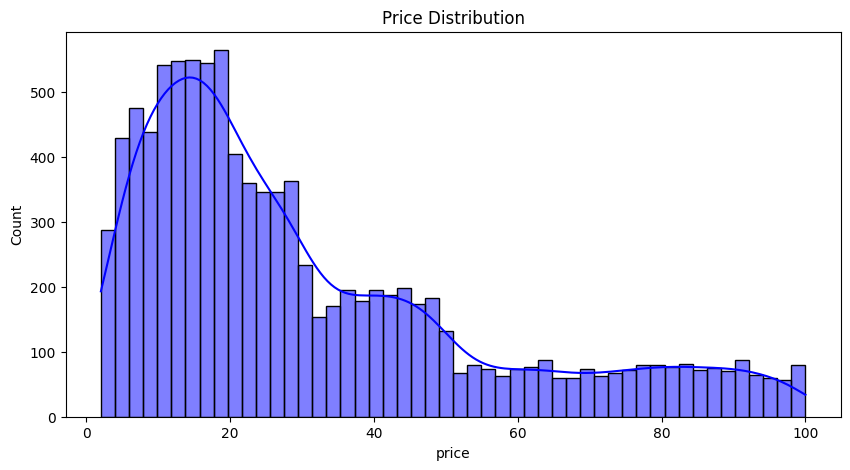

In [398]:

plt.figure(figsize=(10, 5))
fig = sns.histplot(merged_all_data['price'], bins=50, kde=True, color = "blue")
plt.title("Price Distribution")
plt.show()

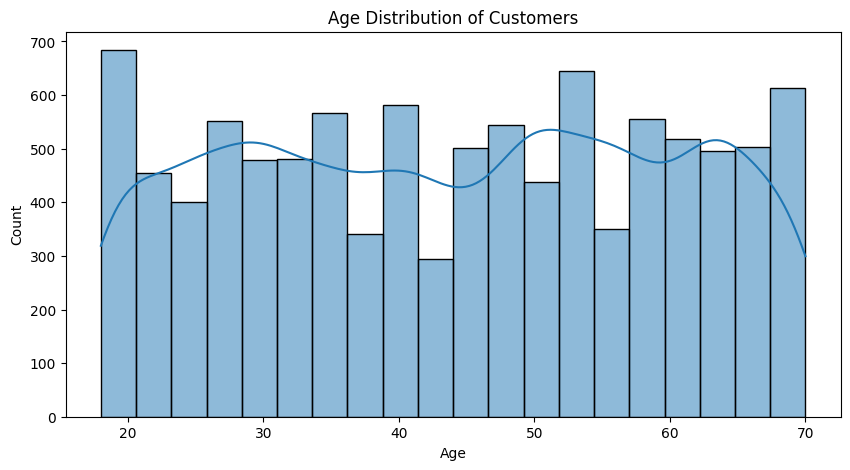

In [399]:
# 1. Distribution of Age Groups
plt.figure(figsize=(10, 5))
sns.histplot(merged_all_data['age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

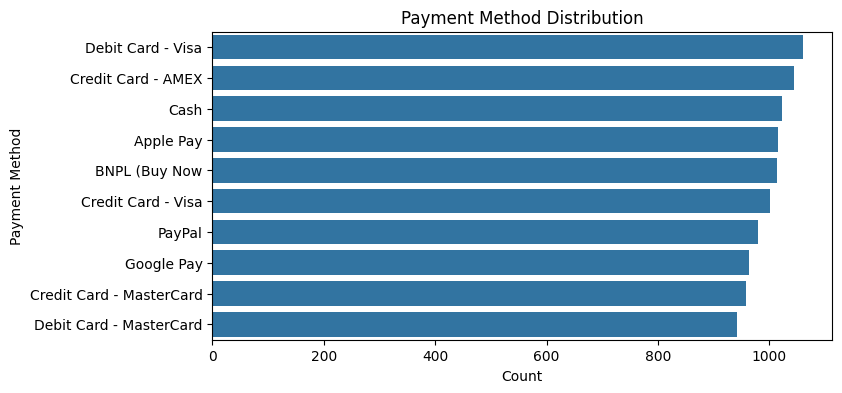

In [400]:
# 2. Payment Method Preferences
plt.figure(figsize=(8, 4))
sns.countplot(y=merged_all_data['payment_method'], order=merged_all_data['payment_method'].value_counts().index)
plt.title("Payment Method Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

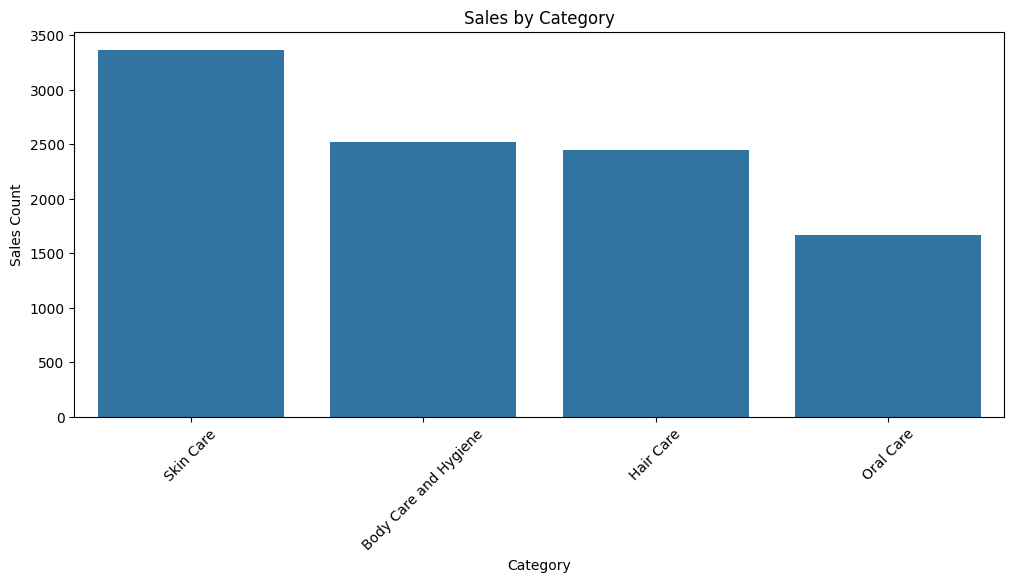

In [401]:
# 3. Sales by Category
plt.figure(figsize=(12, 5))
sns.barplot(x=merged_all_data['category'].value_counts().index, y=merged_all_data['category'].value_counts().values)
plt.xticks(rotation=45)
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales Count")
plt.show()

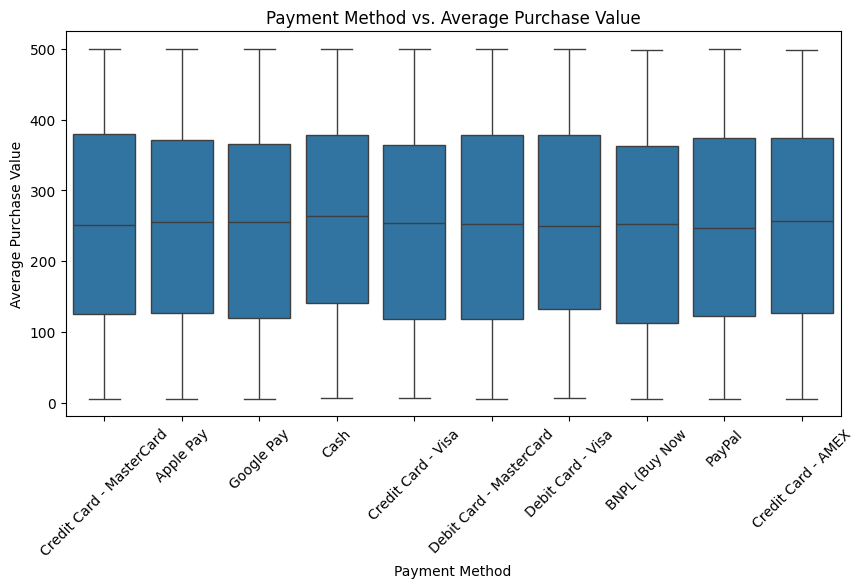

In [402]:
# 10. Payment Method vs. Average Purchase Value
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_all_data['payment_method'], y=merged_all_data['avg_purchase_value'])
plt.xticks(rotation=45)
plt.title("Payment Method vs. Average Purchase Value")
plt.xlabel("Payment Method")
plt.ylabel("Average Purchase Value")
plt.show()

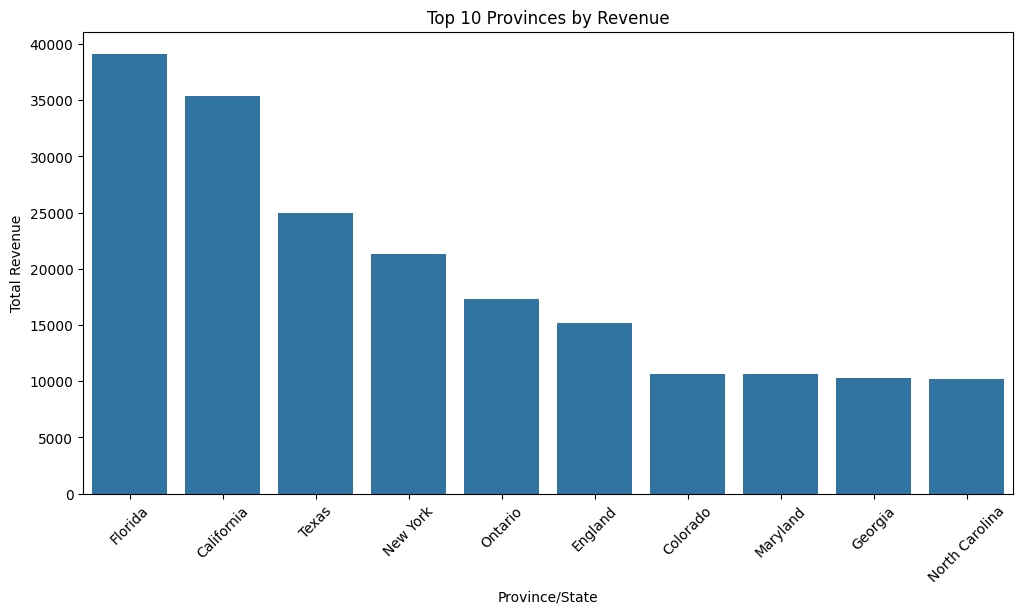

In [403]:
province_revenue = merged_all_data.groupby('province_state')['price'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=province_revenue.index, y=province_revenue.values)
plt.xticks(rotation=45)
plt.title("Top 10 Provinces by Revenue")
plt.xlabel("Province/State")
plt.ylabel("Total Revenue")
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4764\796493574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_revenue.index, y=province_revenue.values, palette="winter")


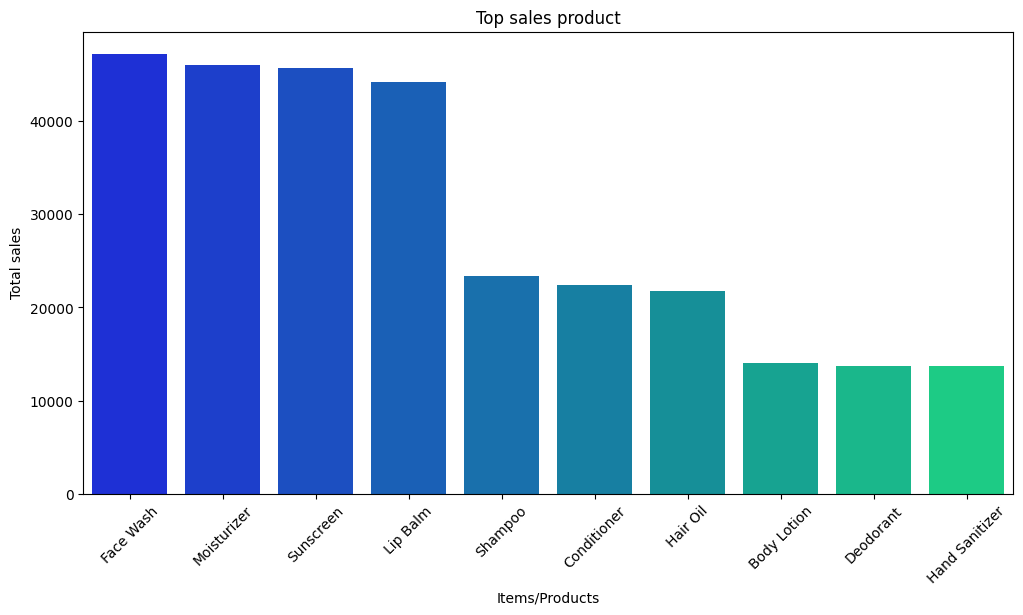

In [435]:
# Sale of top 10 product
province_revenue = merged_all_data.groupby('item')['price'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=province_revenue.index, y=province_revenue.values, palette="winter")
plt.xticks(rotation=45)
plt.title("Top sales product")
plt.xlabel("Items/Products")
plt.ylabel("Total sales")
plt.show()



C:\Users\PMLS\AppData\Local\Temp\ipykernel_4764\3137341781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_all_data['gender'], y=merged_all_data['price'], palette='coolwarm')


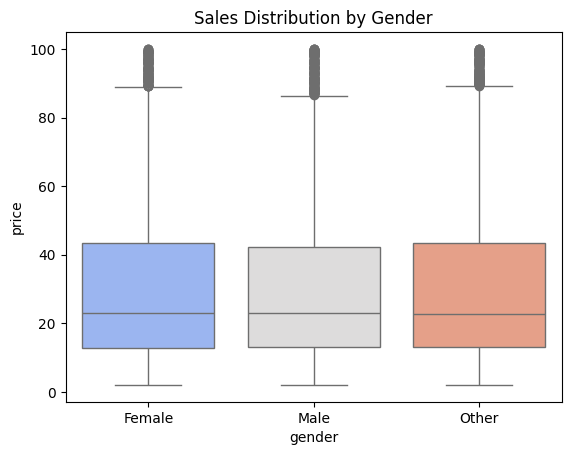

In [433]:
# Sales Distribution by Gender
sns.boxplot(x=merged_all_data['gender'], y=merged_all_data['price'], palette='coolwarm')
plt.title("Sales Distribution by Gender")
plt.show()


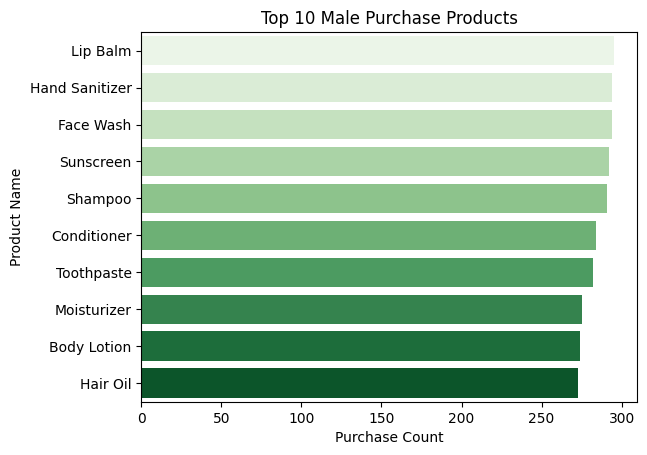

In [431]:
# Top 10 male purchase products
male_top_products = merged_all_data[merged_all_data['gender'] == 'Male']['item'].value_counts().head(10)
sns.barplot(x=male_top_products.values, y=male_top_products.index, hue =male_top_products.index, palette='Greens', legend=False)
plt.xlabel("Purchase Count")
plt.ylabel("Product Name")
plt.title("Top 10 Male Purchase Products")
plt.show()

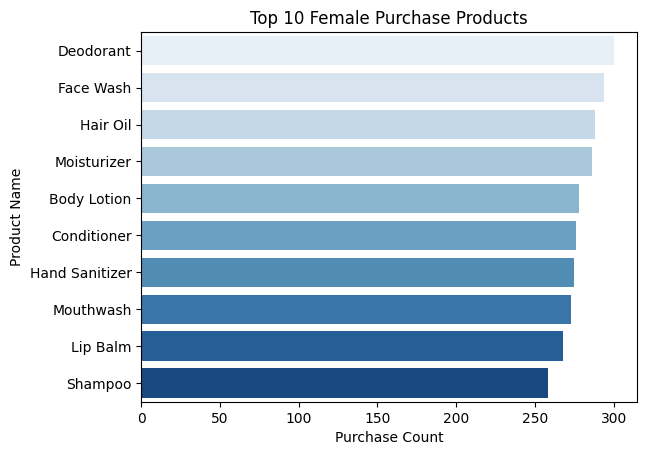

In [430]:
# top 10 female purchase products
female_top_products = merged_all_data[merged_all_data['gender'] == 'Female']['item'].value_counts().head(10)
sns.barplot(x=female_top_products.values, y=female_top_products.index, palette='Blues', hue = female_top_products.index, legend=False)
plt.xlabel("Purchase Count")
plt.ylabel("Product Name")
plt.title("Top 10 Female Purchase Products")
plt.show()

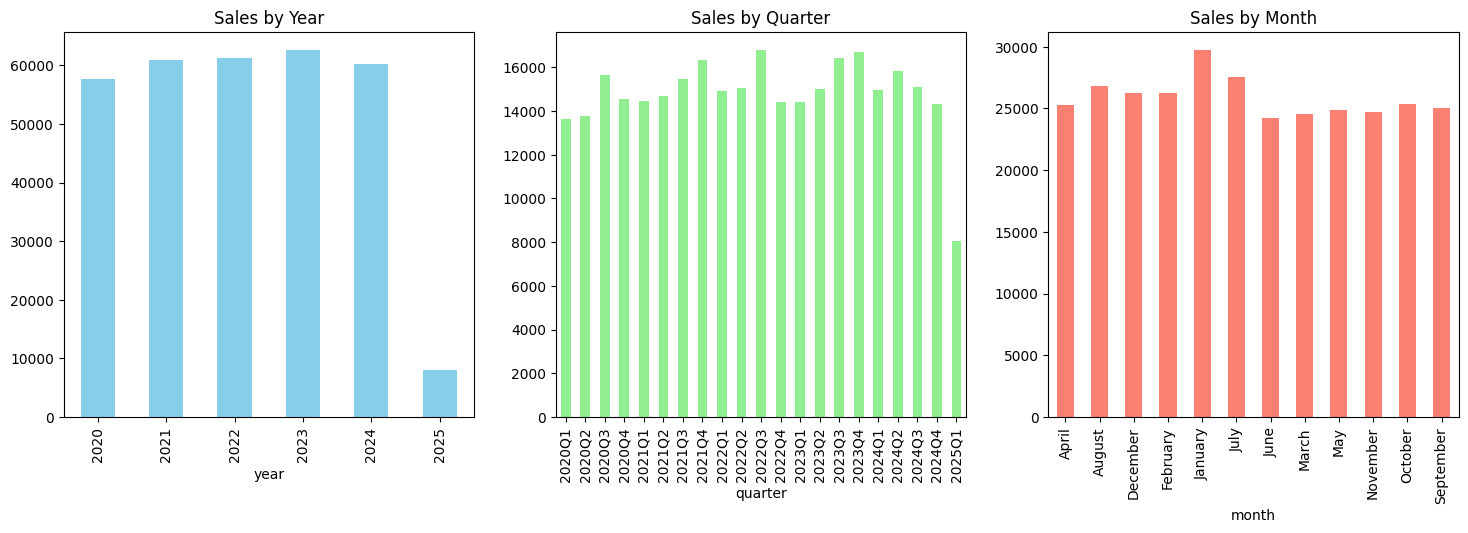

In [408]:
# sales by year and quarter and month

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
merged_all_data.groupby('year')['price'].sum().plot(kind='bar', ax=ax[0], title='Sales by Year', color='skyblue')
merged_all_data.groupby('quarter')['price'].sum().plot(kind='bar', ax=ax[1], title='Sales by Quarter', color='lightgreen')
merged_all_data.groupby('month')['price'].sum().plot(kind='bar', ax=ax[2], title='Sales by Month', color='salmon')
plt.show()

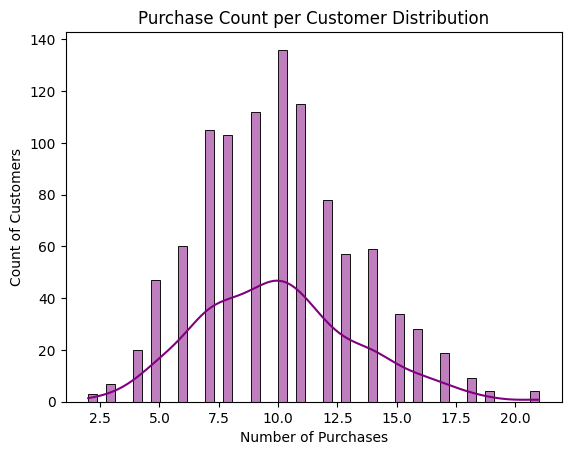

In [416]:
# purchase count per customer distribution
sns.histplot(merged_all_data['customer_id'].value_counts(), bins=50, kde=True, color='purple')
plt.title("Purchase Count per Customer Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Count of Customers")
plt.show()

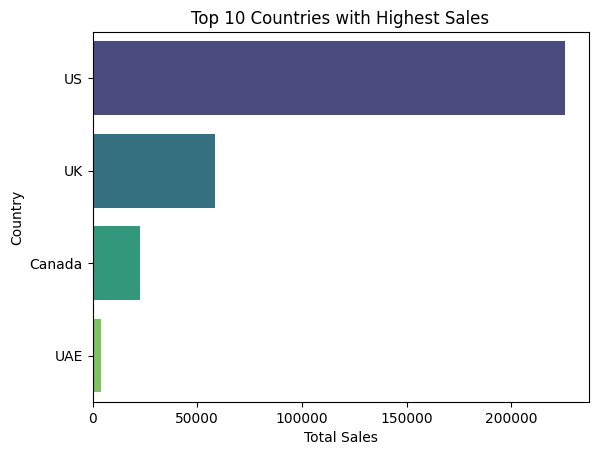

In [429]:
# which country has highest sale
top_countries = merged_all_data.groupby('country')['price'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index,  palette='viridis', legend=False)
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Sales")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_4764\3420481108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_discounts.index, y=top_discounts.values, palette='coolwarm')


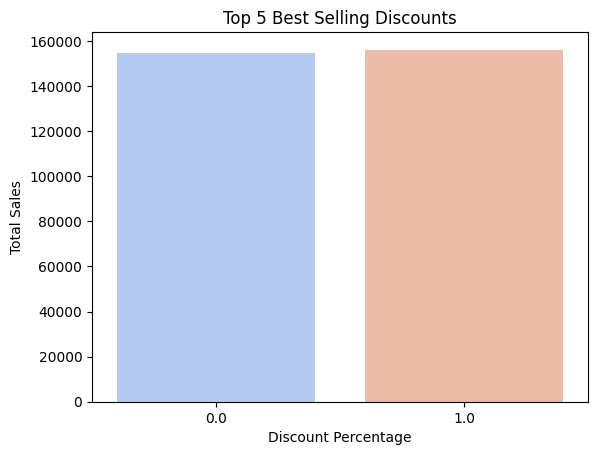

In [425]:
# Top 5 Best Selling Discounts
top_discounts = merged_all_data.groupby('discount_used')['price'].sum()
sns.barplot(x=top_discounts.index, y=top_discounts.values, palette='coolwarm')
plt.xlabel("Discount Percentage")
plt.ylabel("Total Sales")
plt.title("sells on discount")
plt.show()

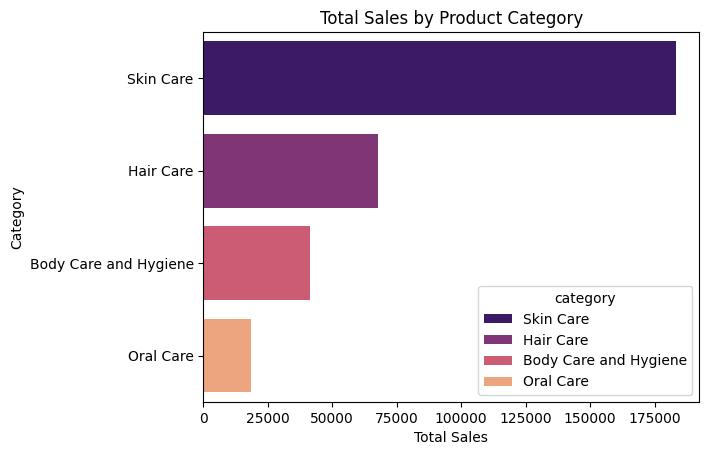

In [428]:
#sales by product category
category_sales = merged_all_data.groupby('category')['price'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index, hue=category_sales.index, palette='magma', legend=True)

plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.title("Total Sales by Product Category")
plt.show()

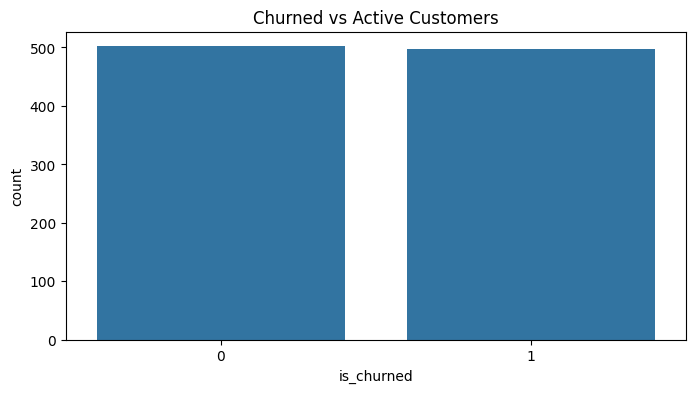

In [412]:

# Churn Analysis
churned_customers = customers_df[customers_df['is_churned'] == 1]
active_customers = customers_df[customers_df['is_churned'] == 0]

plt.figure(figsize=(8, 4))
sns.countplot(x=customers_df['is_churned'])
plt.title("Churned vs Active Customers")
plt.show()